In [109]:
import os
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package wordnet to /Users/jun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/jun/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [110]:
path = "/Users/jun/GitStudy/Data_4/src/project/project5/tiktok"
os.chdir(path)
os.listdir()

['tiktok_test_data.ipynb',
 'tiktok_dashboard_v2.twbx',
 'tiktok_dashboard_v3.twbx',
 '.DS_Store',
 'tiktok_EDA.ipynb',
 'tiktoker_crawling_df_0127.csv',
 '최종 프로젝트 텍스트 리스트 추출 테스트용.ipynb',
 '.~tiktok_dashboard_v3__9439.twbr',
 '0130',
 'results',
 'titoker_crawling.ipynb',
 'tiktok_dashboard.twbx',
 'tiktoker_topic_modeling.ipynb',
 '삼박자(중간제출용)ver2(텍스트 전처리 테스트용).ipynb',
 'tiktok_crawling.py']

In [111]:
tiktoker_df = pd.read_csv("tiktoker_crawling_df_0127.csv")

In [112]:
tiktoker_df

,Unnamed: 0,name,follower,view,like,comment,save,date,info_tag,hash_tag
0,0,mydelicate,399.8K,5158,1334,74,175,14h ago,my favourite blushes and why (with shades)💓 yo...,"['@YesStyle', '@Flower Knows Makeup', '@House ..."
1,1,mydelicate,399.8K,24.3K,6606,246,917,3d ago,spend a productive morning with me 💓🎀 why is i...,"['#koreanskincare', '#kbeauty', '#morningrouti..."
2,2,mydelicate,399.8K,10.4K,1881,90,218,6d ago,for my girlies who still want to look cute whe...,"['@SHEINUS', '@SHEIN', '#fashion', '#winterclo..."
3,3,mydelicate,399.8K,22.1K,4206,193,602,1w ago,new Flower Knows strawberry cupid collection u...,"['@Flower Knows Makeup', '#flowerknows', '#unb..."
4,4,mydelicate,399.8K,17.2K,2995,123,432,1-18,my favourite products for soft skin 🎀💓 names:\...,"['@cosmetic_jolse', '@YesStyle', '@sephora', '..."
...,...,...,...,...,...,...,...,...,...,...
1675,1675,amyflamy1,4.3M,1.4M,131.4K,640,3686,2024-12-14,My hands be too smoll\n#fyp #dance #dancechall...,"['#fyp', '#dance', '#dancechallenge']"
1676,1676,amyflamy1,4.3M,3.8M,431K,1654,21.1K,2024-12-13,We single for a reason✨💅\n\n#fyp #dance #dance...,"['#fyp', '#dance', '#dancechallenge', '#dresst..."
1677,1677,amyflamy1,4.3M,6.2M,647.7K,3055,33.4K,2024-12-12,Bibim noodels mukbang🍜\n#mukbang #mukbangeatin...,"['#mukbang', '#mukbangeatingshow', '#mukbangvi..."
1678,1678,amyflamy1,4.3M,936.9K,94.4K,536,3589,2024-12-10,Welcome girls you’re safe here\n#gurwm #gurwmr...,"['#gurwm', '#gurwmroutine', '#grwm', '#grwmrou..."


In [113]:
# porter stemmer 초기화 및 영어 불용어 세트 생성 (캐글 참고)
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# NLTK 기본 영어 불용어 세트
stop_words = set(stopwords.words('english'))

# K-beauty 관련 추가 불용어
kbeauty_stopwords = {
"’","and", "beauty", "skincare", "cosmetics", "product", "products","use", "using", "from","for","im","i'm","floz",
"skin", "care", "makeup", "mask", "sheet","best", "top", "favorite", 
"amazing", "perfect", "good", "bad", "recommend", "use", "review", "love","brand",
"brands", "item", "items", "category", "categories", "line", "lines","formula", "formulas", "ingredient", "ingredients",
"collection", "collections","set", "sets", "value", "values", "pack", "packs","latest", "exclusive", "limited", 
"special", "popular", "quality", "For","fyp","'","`",
"safe", "worked", "works", "doesn't", "didn't", "okay", "fine", "worth", " product"
"awesome", "okay", "awful", "face", "feel","really","stuff","joseon",
"skin","used","time", "dont","makes","tried","one","skin feel","lot","trying","buy","apply","quite","way","never",
"bought", "always","without","absolutely","might","maybe","sure","think","though", 
"getting","want","result","know", "especially","dr jart","didnt","dosent","purchase","definitely",
"bottle","thing","wash","smell","started","need","fragrance","type","facial","another","noticed","actually", 
"people","money","got","box","every","another","found","jart","wear","drjart","nan","1","no","non","not", "drjart","to", 
"cosrx","From" , "drjrt", "types", "of", " of", "100ml","200ml","300ml","150ml","250ml","50ml","30ml", "338","507","676","purito"}

custom_stopwords = stop_words.union(kbeauty_stopwords)

In [114]:
# 텍스트 전처리 함수
def clean_text(text):
    """텍스트 정리: 소문자 변환, URL 제거, 특수문자 제거"""
    if isinstance(text, str):
        text = text.lower()  # 소문자로 변환
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # URL 제거
        text = re.sub(r'\[.*?\]\(.*?\)', '', text)  # 마크다운 스타일 링크 제거
        text = re.sub(r'@\w+', '', text)  # '@'로 시작하는 단어 제거
        text = re.sub(r'\d+', '', text)  # 숫자 제거
        text = text.translate(str.maketrans('', '', string.punctuation))  # 구두점 및 특수문자 제거
        return text.strip()
    return text

# 텍스트 토큰화 함수
def tokenize_text(text):
    """텍스트를 토큰화"""
    if isinstance(text, str):
        return word_tokenize(text)
    return text

# 불용어 제거 함수
def remove_stopwords(tokens):
    """불용어 제거"""
    if isinstance(tokens, list):
        return [word for word in tokens if word not in custom_stopwords]
    return tokens

def lemmatize_tokens(tokens):
    if isinstance(tokens, list):
        return [lemmatizer.lemmatize(token) for token in tokens]
    else:
        return tokens
    
# 스테밍 함수
def stem_tokens(tokens):
    """토큰에 스테밍 적용"""
    if isinstance(tokens, list):
        return [stemmer.stem(token) for token in tokens]
    return tokens


def preprocess_pipeline(text, is_stemmed=False):
    """텍스트 전처리 파이프라인"""
    cleaned = clean_text(text)  # 텍스트 정리
    tokens = tokenize_text(cleaned)  # 토큰화
    tokens = remove_stopwords(tokens)  # 불용어 제거
    if is_stemmed:
        return stem_tokens(tokens)  # 스테밍 적용
    return tokens

def lemmatized_preprocess_pipeline(text, is_stemmed=False):
    """텍스트 전처리 파이프라인"""
    cleaned = clean_text(text)  # 텍스트 정리
    tokens = tokenize_text(cleaned)  # 토큰화
    tokens = remove_stopwords(tokens)  # 불용어 제거
    tokens = lemmatize_tokens(tokens)  # 표제어 추출
    if is_stemmed:
        return stem_tokens(tokens)  # 스테밍 적용
    return tokens

In [115]:
tiktoker_df['stwd_info_tag'] = tiktoker_df['info_tag'].apply(preprocess_pipeline)
tiktoker_df['stwd_hash_tag'] = tiktoker_df['hash_tag'].apply(preprocess_pipeline)
tiktoker_df['stwd_info_tag_lemmatized'] = tiktoker_df['info_tag'].apply(lemmatized_preprocess_pipeline)
tiktoker_df['stwd_hash_tag_lemmatized'] = tiktoker_df['hash_tag'].apply(lemmatized_preprocess_pipeline)

# 틱톡커 별 많이 사용한 해시태그 top10 모을 건데,
# 불용어 처리 된 버전으로 가져올거야.

In [116]:
from collections import Counter

def get_top5_hashtags(df, stop_words):
    # 결과를 저장할 리스트
    top5_results = []

    for name, group in df.groupby('name'):
        # 모든 해시태그를 하나의 리스트로 평탄화
        all_hashtags = [tag for tags in group['stwd_hash_tag_lemmatized'].dropna() for tag in tags]
        
        # 불용어 제거
        filtered_hashtags = [tag for tag in all_hashtags if tag not in stop_words]
        
        # 상위 5개 추출
        top5 = [tag for tag, _ in Counter(filtered_hashtags).most_common(5)]
        
        # 결과 저장
        top5_results.append({'name': name, 'hash_tag_top5': top5})

    # 데이터프레임으로 변환 후 기존 df와 병합
    top5_df = pd.DataFrame(top5_results)
    df = df.merge(top5_df, on='name', how='left')
    
    return df

# 사용 예시

def get_top10_hashtags(df, stop_words):
    # 결과를 저장할 리스트
    top5_results = []

    for name, group in df.groupby('name'):
        # 모든 해시태그를 하나의 리스트로 평탄화
        all_hashtags = [tag for tags in group['stwd_hash_tag_lemmatized'].dropna() for tag in tags]
        
        # 불용어 제거
        filtered_hashtags = [tag for tag in all_hashtags if tag not in stop_words]
        
        # 상위 5개 추출
        top5 = [tag for tag, _ in Counter(filtered_hashtags).most_common(10)]
        
        # 결과 저장
        top5_results.append({'name': name, 'hash_tag_top5': top5})

    # 데이터프레임으로 변환 후 기존 df와 병합
    top5_df = pd.DataFrame(top5_results)
    df = df.merge(top5_df, on='name', how='left')
    
    return df

# 사용 예시


exclude_words = {'kbeauty','wonyoungism',''}
exclude_words.update(stop_words)
tiktoker_df = get_top10_hashtags(tiktoker_df, exclude_words)


# 결과 확인
tiktoker_df[['name', 'stwd_hash_tag_lemmatized', 'hash_tag_top5']]


,name,stwd_hash_tag_lemmatized,hash_tag_top5
0,mydelicate,"[know, hur, kbeauty, cbeauty, koreanmakeup, wo...","[koreanskincare, pink, koreanmakeup, aesthetic..."
1,mydelicate,"[koreanskincare, kbeauty, morningroutine, vlog...","[koreanskincare, pink, koreanmakeup, aesthetic..."
2,mydelicate,"[fashion, winterclothes, coquette, cute, shein...","[koreanskincare, pink, koreanmakeup, aesthetic..."
3,mydelicate,"[know, flowerknows, unboxing, cbeauty, chinese...","[koreanskincare, pink, koreanmakeup, aesthetic..."
4,mydelicate,"[de, janeiro, selfcare, koreanskincare, skinca...","[koreanskincare, pink, koreanmakeup, aesthetic..."
...,...,...,...
1675,amyflamy1,"[dance, dancechallenge]","[grwm, gurwm, gurwmroutine, grwmroutine, skinc..."
1676,amyflamy1,"[dance, dancechallenge, dresstoimpress, fashio...","[grwm, gurwm, gurwmroutine, grwmroutine, skinc..."
1677,amyflamy1,"[mukbang, mukbangeatingshow, mukbangvideo, eat...","[grwm, gurwm, gurwmroutine, grwmroutine, skinc..."
1678,amyflamy1,"[gurwm, gurwmroutine, grwm, grwmroutine, skinc...","[grwm, gurwm, gurwmroutine, grwmroutine, skinc..."


In [136]:
import pandas as pd
from collections import Counter

def get_top5_hashtags(df, stop_words, threshold=0.75):
    # 1️⃣ 전체 해시태그 사용 빈도 계산
    all_hashtags = [tag for tags in df['stwd_hash_tag_lemmatized'].dropna() for tag in set(tags)]  # set()으로 중복 제거
    total_users = df['name'].nunique()
    hashtag_counts = Counter(all_hashtags)

    # 80% 이상 사용된 해시태그 찾기
    common_hashtags = {tag for tag, count in hashtag_counts.items() if count / total_users >= threshold}

    # 최종적으로 제외할 단어 집합 (불용어 + 자주 사용된 해시태그)
    final_exclude_words = stop_words | common_hashtags

    # 2️⃣ 틱톡커별 해시태그 합산
    top5_results = []

    for name, group in df.groupby('name'):
        # 모든 해시태그 평탄화하여 하나의 리스트로 합치기
        all_hashtags = [tag for tags in group['stwd_hash_tag_lemmatized'].dropna() for tag in tags]

        # 불용어 및 80% 이상 사용된 해시태그 제거
        filtered_hashtags = [tag for tag in all_hashtags if tag not in final_exclude_words]

        # 상위 5개 해시태그 추출
        top5 = [tag for tag, _ in Counter(filtered_hashtags).most_common(10)]

        # 결과 저장
        top5_results.append({'name': name, 'hash_tag_top5': top5})

    # 3️⃣ 결과 데이터프레임 생성 (병합 X, 새로운 DF 생성)
    top5_df = pd.DataFrame(top5_results)

    return top5_df

# 사용 예시
exclude_words = {'kbeauty', 'wonyoungism', 'woniluv','추천','추천떠라','fypシ゚','リップグロウ','fypシ゚viral'}
exclude_words.update(stop_words)  # 기존 불용어 추가    

tiktoker_top5_df = get_top5_hashtags(tiktoker_df, exclude_words)

# 결과 확인
tiktoker_top5_df

,name,hash_tag_top5
0,.blissdiaries,"[kpopfyp, douyin, xyzabc, kbeautymakeup, olive..."
1,.m.egan,"[beautyinfluencer, jolse, xiaohongshu, glitter..."
2,.woniluv,"[tiktokban, tiktokbanned, pretty, dance, usati..."
3,4chriisty,"[jbeauty, blue, romand, pr, palette, goviral, ..."
4,__.annie.s,"[influencer, abib, influencers, minivlog, heim..."
5,_luvwonsnnx,"[foruu, dontletthisflop, fyppp, viralvideo, wo..."
6,aeiezo.pdf,"[moot, creatorsearchinsights, routine, nightro..."
7,ameenbeautytips,[ameenbeautytips]
8,amyflamy1,"[gurwm, gurwmroutine, grwmroutine, makeuptutor..."
9,asiamelon,"[shop, numbuzin, gopicky, pickyreview, tonerpa..."


In [ ]:
os.getcwd()
os.chdir("/Users/jun/GitStudy/Data_4/src/project/project5/tiktok/0130")

#/Users/jun/GitStudy/Data_4/Data/project/project5/tiktok

In [138]:
tiktoker_top5_df.to_csv("tiktoker_top10_hashtags.csv", index=False, encoding='utf-8')

In [121]:
tiktoker_top5_df.merge(tiktoker_df, on='name', how='left')[['name', 'hash_tag_top5', 'info_tag', 'hash_tag']]

KeyError: "['hash_tag_top5'] not in index"

## bigram, trigram 시도.
- 텍스트 자체가 짧고 게시물 개수도 적어서 좋은 결과가 나오지 x..

- 영상 해시태그는 당연히도 좋은 결과 x

In [8]:
tiktoker_df['cleaned_info_tag'] = tiktoker_df['info_tag'].apply(clean_text)
tiktoker_df['cleaned_hash_tag'] = tiktoker_df['hash_tag'].apply(clean_text)


# bigram
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_documents([comment.split() for comment in tiktoker_df.cleaned_hash_tag if isinstance(comment, str)])

# # 불용어 제거 반영된 상태에서 진행
# finder.apply_word_filter(lambda w: w in stop_words)

# Filter only those that occur at least 10 times
###### 여기서 조정 필요
#finder.apply_freq_filter(10)
finder.apply_freq_filter(10)
bigram_scores = finder.score_ngrams(bigram_measures.pmi)
bigram_scores[:10]

# trigram
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = nltk.collocations.TrigramCollocationFinder.from_documents([comment.split() for comment in tiktoker_df.cleaned_hash_tag if isinstance(comment, str)])
# finder.apply_word_filter(lambda w: w in stop_words)
# Filter only those that occur at least 50 times
#finder.apply_freq_filter(10)
finder.apply_freq_filter(10)
trigram_scores = finder.score_ngrams(trigram_measures.pmi)
trigram_scores[:25]

[(('haircareproducts', 'haircarehacks', 'haircaretip'), 18.50692463112869),
 (('haircaretips', 'haircareproducts', 'haircarehacks'), 18.450341102762323),
 (('cleangirlhacks', 'signaturelook', 'luxurylifestyle'), 18.24217375270588),
 (('luxurylifestyle', 'luxuryaesthetic', 'declutter'), 18.24217375270588),
 (('selfdevelopment', 'selfimprovement', 'selfcaretips'), 18.24217375270588),
 (('signaturelook', 'luxurylifestyle', 'luxuryaesthetic'), 18.24217375270588),
 (('xhealth', 'healthylifestyle', 'healthandwellness'), 18.24217375270588),
 (('declutter', 'declutterchallenge', 'xhealth'), 18.242173752705877),
 (('declutterchallenge', 'xhealth', 'healthylifestyle'), 18.242173752705877),
 (('luxuryaesthetic', 'declutter', 'declutterchallenge'), 18.242173752705877),
 (('bodycareproducts', 'bodycaretips', 'bodycareviral'), 18.193264152224934),
 (('cleangirlaesthetic', 'cleangirlhacks', 'signaturelook'),
  18.193264152224934),
 (('cleanhome', 'cleanliving', 'minimalistic'), 18.055760628475),
 (('

In [9]:
import pltKorean_mac
pltKorean_mac.set_font_manager()

Using font: /Library/Fonts/Arial Unicode.ttf


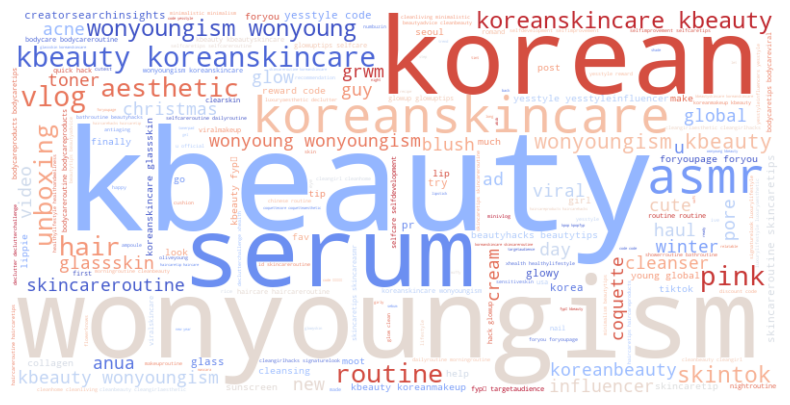

/var/folders/29/5wmqbm4j3x10qv5vgm_bm8f80000gn/T/ipykernel_1561/1926127616.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_words_df, x='Count', y='Word', palette='viridis')
/opt/homebrew/Caskroom/miniconda/base/envs/leo4study/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127872 (\N{RIBBON}) missing from font(s) Arial Unicode MS.
  fig.canvas.print_figure(bytes_io, **kw)


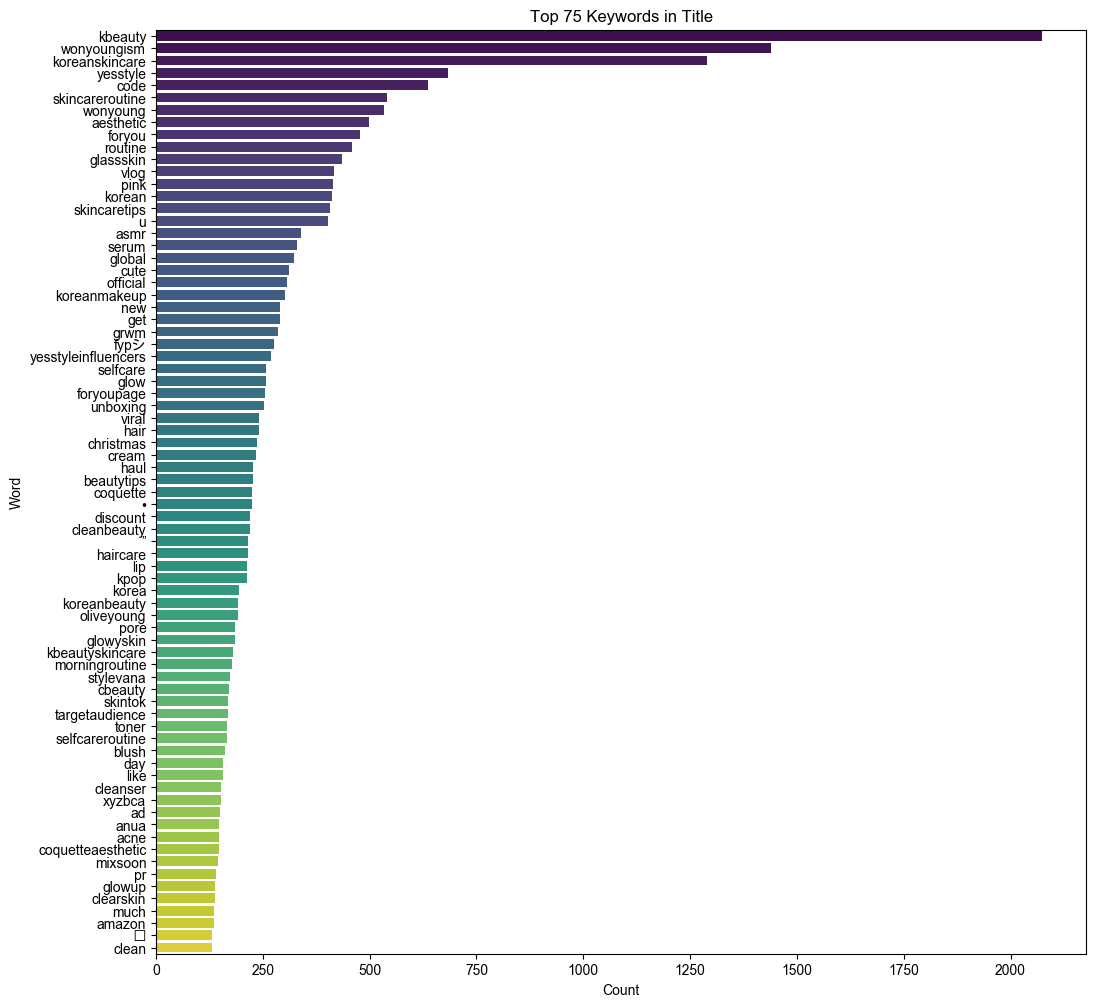

In [10]:
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# 테스트용
try:
    # 1. 리스트의 리스트를 하나의 리스트로 평탄화
    test_words = []
    for word_list in tiktoker_df['stwd_info_tag_lemmatized'].dropna():
        # word_list가 리스트인지 확인하는 추가적인 검사
        if isinstance(word_list, list):
            test_words.extend(word_list)
        elif isinstance(word_list, str):  # 만약 이미 문자열이라면 그대로 추가
            test_words.append(word_list)
        else: # 리스트나 문자열이 아닌 경우 예외처리
            print(f"Unexpected data type: {type(word_list)}, Value: {word_list}")
            continue # 다음 항목으로 건너뛰기
    
    if not test_words: # all_words가 비어있는 경우 예외처리
        print("No valid words found after processing. Check your data.")
        exit() # 프로그램 종료

    test_words_3 = []
    # 2. 하나의 리스트를 문자열로 결합
    for i in range(len(test_words) - 2):      # 2-gram이므로 리스트의 마지막에서 요소 한 개 앞까지만 반복함
        test_words_3.append([test_words[i], test_words[i + 1], test_words[i + 2]])
    
    # 리스트에 대해서 평탄화 2번째
    test_words_t = []
    for word_list in test_words_3: # amazon_df['stpw_processed_title'].dropna()
        # word_list가 리스트인지 확인하는 추가적인 검사
        if isinstance(word_list, list):
            test_words_t.extend(word_list)
        elif isinstance(word_list, str):  # 만약 이미 문자열이라면 그대로 추가
            test_words_t.append(word_list)
        else: # 리스트나 문자열이 아닌 경우 예외처리
            print(f"Unexpected data type: {type(word_list)}, Value: {word_list}")
            continue # 다음 항목으로 건너뛰기
    
    if not test_words_t: # all_words가 비어있는 경우 예외처리
        print("No valid words found after processing. Check your data.")
        exit() # 프로그램 종료
    text_3 = ' '.join(test_words_t)

    # WordCloud 생성 및 시각화
    wordcloud = WordCloud(width=800, height=400,
                        background_color='white', colormap='coolwarm').generate(text_3)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
    review_text_3 = text_3
    words = [word for word in review_text_3.split() if word.lower() not in stop_words]
    common_words = Counter(words).most_common(75)

    # 막대그래프로 표시
    common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])
    plt.figure(figsize=(12, 12))
    sns.barplot(data=common_words_df, x='Count', y='Word', palette='viridis')
    plt.title('Top 75 Keywords in Title')
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

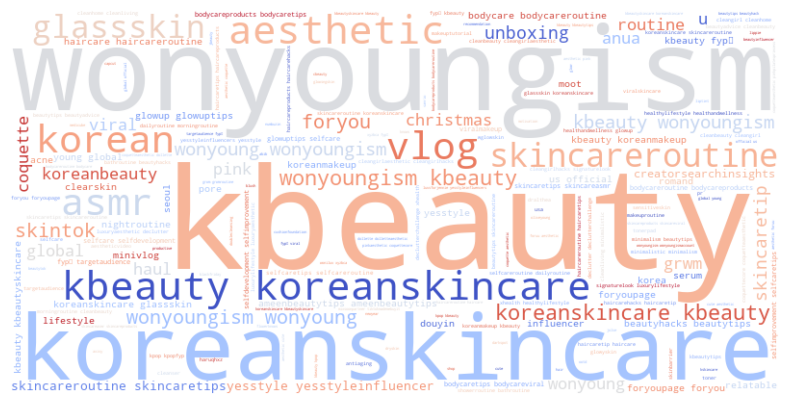

/var/folders/29/5wmqbm4j3x10qv5vgm_bm8f80000gn/T/ipykernel_1561/660447232.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_words_df, x='Count', y='Word', palette='viridis')


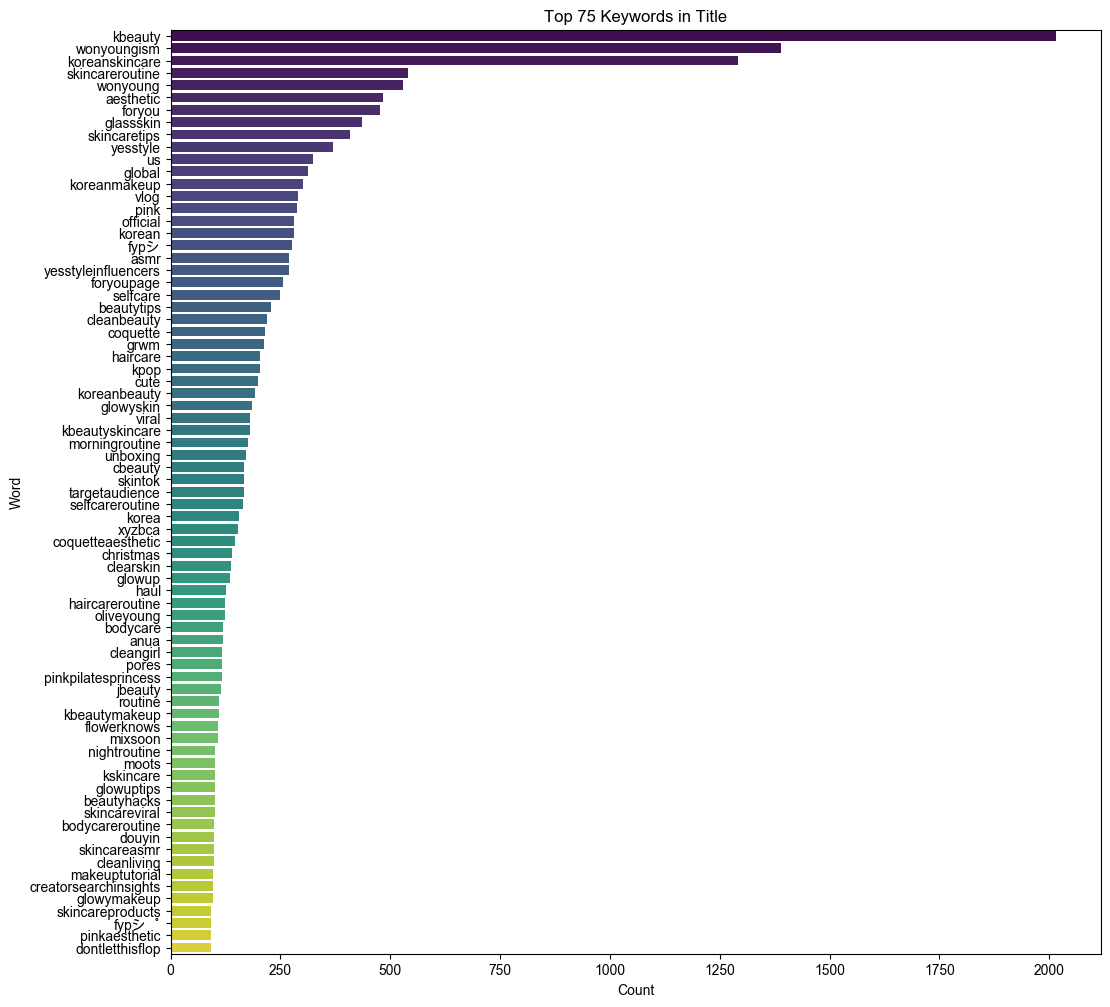

In [11]:
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
# 테스트용
try:
    # 1. 리스트의 리스트를 하나의 리스트로 평탄화
    test_words = []
    for word_list in tiktoker_df['stwd_hash_tag'].dropna():
        # word_list가 리스트인지 확인하는 추가적인 검사
        if isinstance(word_list, list):
            test_words.extend(word_list)
        elif isinstance(word_list, str):  # 만약 이미 문자열이라면 그대로 추가
            test_words.append(word_list)
        else: # 리스트나 문자열이 아닌 경우 예외처리
            print(f"Unexpected data type: {type(word_list)}, Value: {word_list}")
            continue # 다음 항목으로 건너뛰기
    
    if not test_words: # all_words가 비어있는 경우 예외처리
        print("No valid words found after processing. Check your data.")
        exit() # 프로그램 종료

    test_words_3 = []
    # 2. 하나의 리스트를 문자열로 결합
    for i in range(len(test_words) - 2):      # 2-gram이므로 리스트의 마지막에서 요소 한 개 앞까지만 반복함
        test_words_3.append([test_words[i], test_words[i + 1], test_words[i + 2]])
    
    # 리스트에 대해서 평탄화 2번째
    test_words_t = []
    for word_list in test_words_3: # amazon_df['stpw_processed_title'].dropna()
        # word_list가 리스트인지 확인하는 추가적인 검사
        if isinstance(word_list, list):
            test_words_t.extend(word_list)
        elif isinstance(word_list, str):  # 만약 이미 문자열이라면 그대로 추가
            test_words_t.append(word_list)
        else: # 리스트나 문자열이 아닌 경우 예외처리
            print(f"Unexpected data type: {type(word_list)}, Value: {word_list}")
            continue # 다음 항목으로 건너뛰기
    
    if not test_words_t: # all_words가 비어있는 경우 예외처리
        print("No valid words found after processing. Check your data.")
        exit() # 프로그램 종료
    text_3 = ' '.join(test_words_t)

    # WordCloud 생성 및 시각화
    wordcloud = WordCloud(width=800, height=400,
                        background_color='white', colormap='coolwarm').generate(text_3)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
    review_text_3 = text_3
    words = [word for word in review_text_3.split() if word.lower() not in stop_words]
    common_words = Counter(words).most_common(75)

    # 막대그래프로 표시
    common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])
    plt.figure(figsize=(12, 12))
    sns.barplot(data=common_words_df, x='Count', y='Word', palette='viridis')
    plt.title('Top 75 Keywords in Title')
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

In [12]:
# Prepare data for LDA Analysis
import gensim
from gensim.utils import simple_preprocess


stop_words.update(['from', 'subject', 're', 'edu', 'use','object','generator','genexpr'])

# 문장 토큰화 함수 정의
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

# 불용어 제거 함수 정의
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
    if word not in stop_words] for doc in texts]

# 데이터 변환    
data = tiktoker_df.stwd_hash_tag.tolist()
data_words = list(sent_to_words(data))

# 불용어 제거
data_words = remove_stopwords(data_words)

# 출력 확인
print(data_words[:1][0][:30])

['knows', 'hur', 'kbeauty', 'cbeauty', 'koreanmakeup', 'wonyoungism', 'blush']


In [13]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


In [14]:
# LDA model training
from pprint import pprint
# number of topics
num_topics = 7
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=num_topics, passes=10, iterations=200)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.043*"cleanbeauty" + 0.026*"morningroutine" + 0.023*"selfcareroutine" + '
  '0.023*"cleangirl" + 0.020*"glowup" + 0.020*"glowuptips" + '
  '0.020*"cleanliving" + 0.019*"selfcare" + 0.019*"beautytips" + '
  '0.017*"minimalistic"'),
 (1,
  '0.066*"kbeauty" + 0.036*"fypシ" + 0.030*"koreanmakeup" + 0.019*"glowymakeup" '
  '+ 0.018*"global" + 0.015*"glowyskin" + 0.014*"woniluv" + 0.014*"xyzbca" + '
  '0.013*"makeuptutorial" + 0.010*"koreanbeauty"'),
 (2,
  '0.057*"wonyoungism" + 0.054*"kbeauty" + 0.037*"wonyoung" + 0.025*"foryou" + '
  '0.023*"yesstyle" + 0.019*"kpop" + 0.016*"cbeauty" + 0.015*"koreanskincare" '
  '+ 0.014*"aesthetic" + 0.013*"foryoupage"'),
 (3,
  '0.075*"koreanskincare" + 0.051*"kbeauty" + 0.035*"glassskin" + 0.034*"us" + '
  '0.024*"official" + 0.023*"wonyoungism" + 0.018*"skincareroutine" + '
  '0.017*"mixsoon" + 0.014*"ameenbeautytips" + 0.014*"luvsforjennie"'),
 (4,
  '0.054*"kbeauty" + 0.050*"wonyoungism" + 0.037*"koreanskincare" + '
  '0.026*"aesthetic" + 0.

In [15]:
import os
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# Create directory if it does not exist
if not os.path.exists('./results'):
    os.makedirs('./results')

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.059830 -0.035891       1        1  20.450745
2      0.141253 -0.137007       2        1  19.971924
6     -0.029161  0.173861       3        1  15.318121
3      0.047382  0.115523       4        1  12.802599
5      0.060912 -0.052986       5        1  11.970976
0     -0.301748 -0.079470       6        1  10.154796
1      0.021532  0.015970       7        1   9.330840, topic_info=                Term        Freq       Total Category  logprob  loglift
1517     cleanbeauty   59.000000   59.000000  Default  30.0000  30.0000
7     koreanskincare  359.000000  359.000000  Default  29.0000  29.0000
3            kbeauty  558.000000  558.000000  Default  28.0000  28.0000
689             fypシ  100.000000  100.000000  Default  27.0000  27.0000
72          wonyoung  151.000000  151.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
53          official    5.819978   78.078788   Topic7  -5.3660  -0.2246
490            young    4.676419   24.605849   Topic7  -5.5847   0.7114
80         christmas    4.772117   39.840477   Topic7  -5.5645   0.2498
524    sensitiveskin    4.399449   19.400930   Topic7  -5.6458   0.8880
7     koreanskincare    4.947398  359.415520   Topic7  -5.5284  -1.9138

[401 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
193       1  0.039327  acne
193       2  0.117980  acne
193       3  0.235960  acne
193       4  0.393266  acne
193       5  0.078653  acne
...     ...       ...   ...
2638      2  0.089017    추천
2638      5  0.667629    추천
2647      1  0.218126  추천떠라
2647      2  0.109063  추천떠라
2647      5  0.654377  추천떠라

[666 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 7, 4, 6, 1, 2])

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis

# 데이터 준비
data = tiktoker_df['stwd_hash_tag'].dropna().tolist()

# 리스트의 리스트를 문자열 리스트로 변환
data = [' '.join(item) if isinstance(item, list) else item for item in data]

# CountVectorizer를 사용하여 텍스트 데이터 변환
vectorizer = CountVectorizer(
    max_df=0.95,  # 전체 문서의 90% 이상에서 나타나는 단어는 제거
    min_df=5,    # 최소 5개의 문서에 등장하는 단어만 포함
    stop_words=list(stop_words)  # 불용어 제거
)

# 단어-문서 행렬 생성
dtm = vectorizer.fit_transform(data)

# LDA 모델 정의 및 학습
num_topics = 5
lda_model = LatentDirichletAllocation(
    n_components=num_topics,
    max_iter=10,   # 최대 반복 횟수
    learning_method='online',
    random_state=42
)
lda_model.fit(dtm)

# 토픽별 키워드 출력
def print_topics(model, vectorizer, top_n=10):
    keywords = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        print(f"토픽 {idx + 1}: {', '.join([keywords[i] for i in topic.argsort()[:-top_n - 1:-1]])}")

print_topics(lda_model, vectorizer)

# pyLDAvis 시각화
pyLDAvis.enable_notebook()

# pyLDAvis 준비
lda_vis = pyLDAvis.prepare(
    topic_term_dists=lda_model.components_ / lda_model.components_.sum(axis=1)[:, None],
    doc_topic_dists=lda_model.transform(dtm),
    doc_lengths=dtm.sum(axis=1).A1,
    vocab=vectorizer.get_feature_names_out(),
    term_frequency=dtm.sum(axis=0).A1
)

# HTML 저장 및 시각화
pyLDAvis.save_html(lda_vis, './results/sklearn_lda_topics.html')
pyLDAvis.display(lda_vis)


토픽 1: kbeauty, fypシ, koreanmakeup, coquetteaesthetic, wonyoung, wonyoungism, foryou, cbeauty, korea, pinkpilatesprincess
토픽 2: skincareroutine, grwm, koreanskincare, grwmroutine, gurwmroutine, skincaretips, gurwm, koreanmakeup, haircare, grwmmakeup
토픽 3: wonyoungism, kbeauty, aesthetic, koreanskincare, wonyoung, yesstyle, vlog, foryou, pink, korean
토픽 4: koreanskincare, kbeauty, glassskin, us, global, skincareroutine, official, glowyskin, skincaretips, clearskin
토픽 5: cleanbeauty, selfcareroutine, glowup, morningroutine, cleangirl, selfcare, asmr, glowuptips, cleanliving, glowymakeup


# 틱톡커 별 토픽 모델링

In [17]:
tiktoker_df['name'].unique()

array(['mydelicate', 'velcroluv', 'caspertheghostyy', 'bwnniewony',
       'aeiezo.pdf', 'milkydew', 'emchu_', 'songofskin', '4chriisty',
       '.blissdiaries', 'dearwonii_', 'olafflee', 'jasminnlily_',
       '_luvwonsnnx', 'koocat', 'jeb_bi', '.m.egan', 'jaerini',
       'onlydahia', 'saeroniee', 'moonskinclub', 'heartsfor.kbeauty',
       'ririsglow_', 'thelipstickgirly', 'gae4hrv', '__.annie.s',
       'cleanlivingkarly', 'aylennpark', 'itsedonna', 'cleangirlhacks',
       'danicolexx', 'tracyy_s', 'haruqhxz', 'krystallee2222',
       'ooolongmilkteaa', 'kwyeona', 'vanessafaga', 'izzydiaries',
       'luvsfor.jennie', 'glowupwithinah', 'its.kaylas', 'widyaatharva01',
       'rosiehashs', 'asiamelon', 'ameenbeautytips', 'lovelymiri05',
       'monakoaa', 'ayheyt3u', 'soft.milky.latte', 'misscasxie',
       '.woniluv', 'ofeemi7', 'nana.tan07', 'minseonk1m', 'fromh1ae_',
       'amyflamy1'], dtype=object)

In [18]:
tker2 = tiktoker_df[tiktoker_df['name']== 'velcroluv']

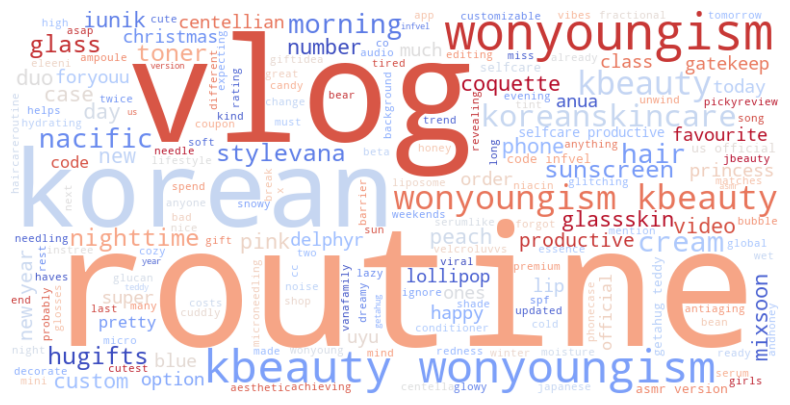

/var/folders/29/5wmqbm4j3x10qv5vgm_bm8f80000gn/T/ipykernel_1561/834399596.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_words_df, x='Count', y='Word', palette='viridis')


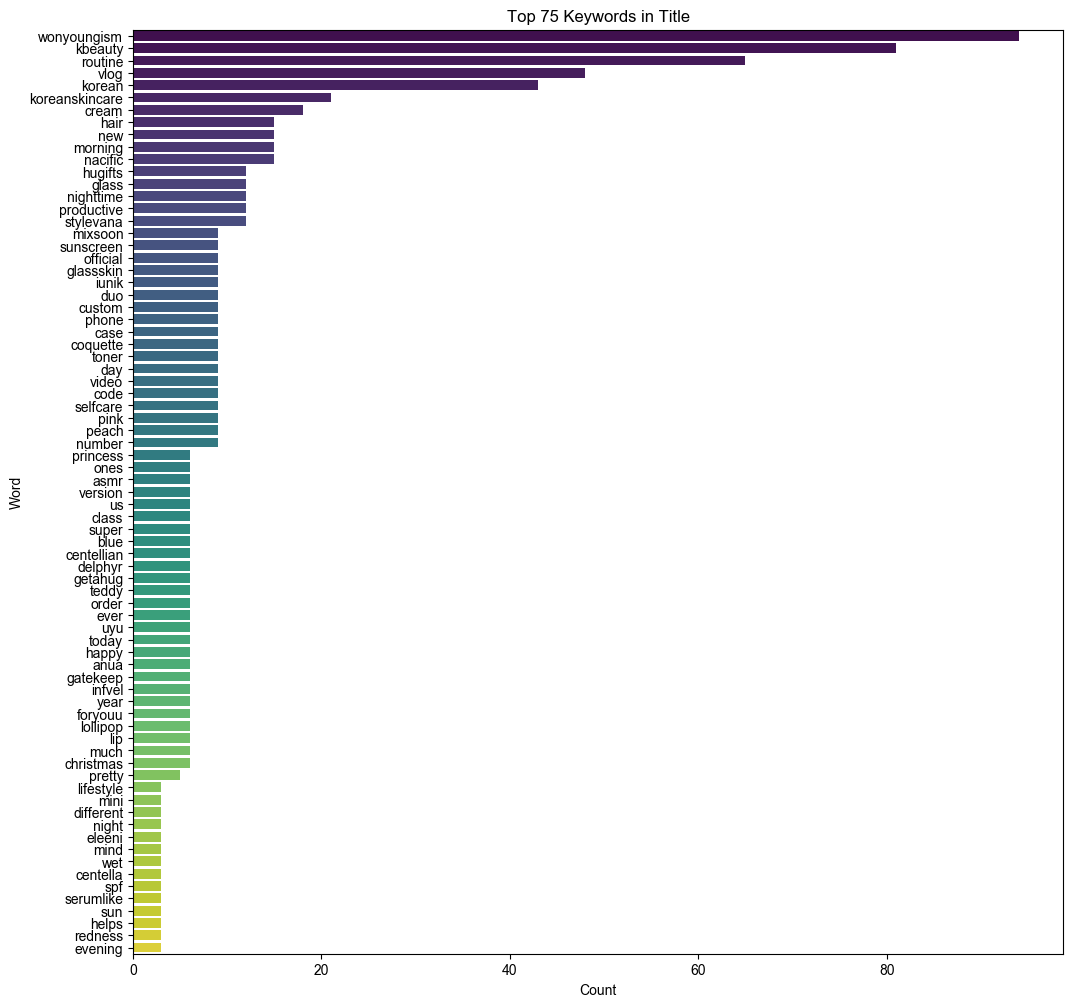

In [19]:
try:
    # 1. 리스트의 리스트를 하나의 리스트로 평탄화
    test_words = []
    for word_list in tker2['stwd_info_tag'].dropna():
        # word_list가 리스트인지 확인하는 추가적인 검사
        if isinstance(word_list, list):
            test_words.extend(word_list)
        elif isinstance(word_list, str):  # 만약 이미 문자열이라면 그대로 추가
            test_words.append(word_list)
        else: # 리스트나 문자열이 아닌 경우 예외처리
            print(f"Unexpected data type: {type(word_list)}, Value: {word_list}")
            continue # 다음 항목으로 건너뛰기
    
    if not test_words: # all_words가 비어있는 경우 예외처리
        print("No valid words found after processing. Check your data.")
        exit() # 프로그램 종료

    test_words_3 = []
    # 2. 하나의 리스트를 문자열로 결합
    for i in range(len(test_words) - 2):      # 2-gram이므로 리스트의 마지막에서 요소 한 개 앞까지만 반복함
        test_words_3.append([test_words[i], test_words[i + 1], test_words[i + 2]])
    
    # 리스트에 대해서 평탄화 2번째
    test_words_t = []
    for word_list in test_words_3: # amazon_df['stpw_processed_title'].dropna()
        # word_list가 리스트인지 확인하는 추가적인 검사
        if isinstance(word_list, list):
            test_words_t.extend(word_list)
        elif isinstance(word_list, str):  # 만약 이미 문자열이라면 그대로 추가
            test_words_t.append(word_list)
        else: # 리스트나 문자열이 아닌 경우 예외처리
            print(f"Unexpected data type: {type(word_list)}, Value: {word_list}")
            continue # 다음 항목으로 건너뛰기
    
    if not test_words_t: # all_words가 비어있는 경우 예외처리
        print("No valid words found after processing. Check your data.")
        exit() # 프로그램 종료
    text_3 = ' '.join(test_words_t)

    # WordCloud 생성 및 시각화
    wordcloud = WordCloud(width=800, height=400,
                        background_color='white', colormap='coolwarm').generate(text_3)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
    review_text_3 = text_3
    words = [word for word in review_text_3.split() if word.lower() not in stop_words]
    common_words = Counter(words).most_common(75)

    # 막대그래프로 표시
    common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])
    plt.figure(figsize=(12, 12))
    sns.barplot(data=common_words_df, x='Count', y='Word', palette='viridis')
    plt.title('Top 75 Keywords in Title')
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

In [23]:
# 데이터 준비
data = tker2['stwd_hash_tag'].dropna().tolist()

# 리스트의 리스트를 문자열 리스트로 변환
data = [' '.join(item) if isinstance(item, list) else item for item in data]

# CountVectorizer를 사용하여 텍스트 데이터 변환
vectorizer = CountVectorizer(
    max_df=0.8,  # 전체 문서의 90% 이상에서 나타나는 단어는 제거
    min_df=3,    # 최소 3개의 문서에 등장하는 단어만 포함
    stop_words=list(stop_words)  # 불용어 제거
)

# 단어-문서 행렬 생성
dtm = vectorizer.fit_transform(data)

# LDA 모델 정의 및 학습
num_topics = 2
lda_model = LatentDirichletAllocation(
    n_components=num_topics,
    max_iter=10,   # 최대 반복 횟수
    learning_method='online',
    random_state=42
)
lda_model.fit(dtm)

# 토픽별 키워드 출력
def print_topics(model, vectorizer, top_n=10):
    keywords = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        print(f"토픽 {idx + 1}: {', '.join([keywords[i] for i in topic.argsort()[:-top_n - 1:-1]])}")

print_topics(lda_model, vectorizer)

# pyLDAvis 시각화
pyLDAvis.enable_notebook()

# pyLDAvis 준비
lda_vis = pyLDAvis.prepare(
    topic_term_dists=lda_model.components_ / lda_model.components_.sum(axis=1)[:, None],
    doc_topic_dists=lda_model.transform(dtm),
    doc_lengths=dtm.sum(axis=1).A1,
    vocab=vectorizer.get_feature_names_out(),
    term_frequency=dtm.sum(axis=0).A1
)

# HTML 저장 및 시각화
pyLDAvis.save_html(lda_vis, './results/sklearn_lda_topics.html')
pyLDAvis.display(lda_vis)

토픽 1: routine, vlog, korean, koreanskincare, official, glassskin
토픽 2: korean, koreanskincare, glassskin, official, routine, vlog


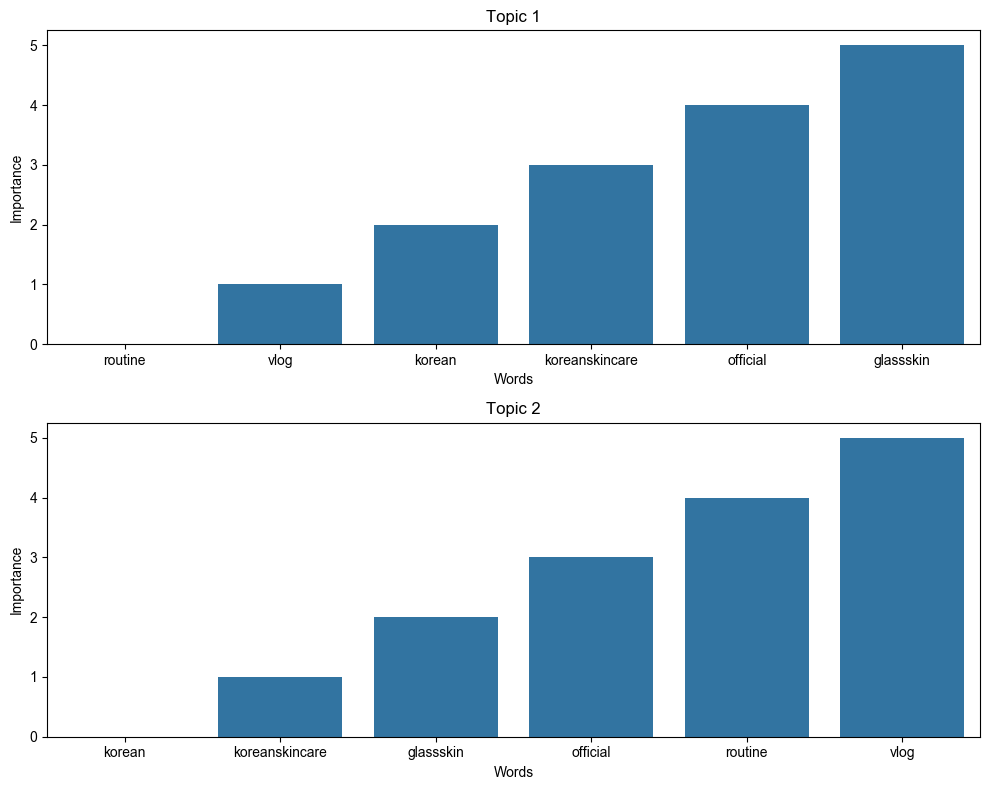

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 각 토픽에서의 주요 단어와 그 중요도 추출
num_words = 10
keywords = vectorizer.get_feature_names_out()
topic_words = []
for topic in lda_model.components_:
    topic_words.append([keywords[i] for i in topic.argsort()[:-num_words - 1:-1]])

# 시각화
fig, ax = plt.subplots(num_topics, 1, figsize=(10, 8))
for i, topic in enumerate(topic_words):
    sns.barplot(x=topic, y=np.arange(len(topic)), ax=ax[i])
    ax[i].set_title(f"Topic {i + 1}")
    ax[i].set_xlabel('Words')
    ax[i].set_ylabel('Importance')

plt.tight_layout()
plt.show()

# 추려진 틱톡커 토픽 모델링 진행

emchu_, krystallee2222, ofeemi7, thelipstickgirly, aeiezo.pdf

In [30]:
#emchu_, krystallee2222, ofeemi7, thelipstickgirly, aeiezo.pdf

In [25]:
# 제외할 단어 목록을 리스트 또는 집합(set)으로 정의

def tker_word_cloud(tker1, exclude_words):
    try:
        # 1. 리스트의 리스트를 하나의 리스트로 평탄화
        test_words = []
        for word_list in tker1['stwd_info_tag'].dropna():
            # word_list가 리스트인지 확인하는 추가적인 검사
            if isinstance(word_list, list):
                test_words.extend(word_list)
            elif isinstance(word_list, str):  # 만약 이미 문자열이라면 그대로 추가
                test_words.append(word_list)
            else: # 리스트나 문자열이 아닌 경우 예외처리
                print(f"Unexpected data type: {type(word_list)}, Value: {word_list}")
                continue # 다음 항목으로 건너뛰기
        
        if not test_words: # all_words가 비어있는 경우 예외처리
            print("No valid words found after processing. Check your data.")
            exit() # 프로그램 종료

        test_words_3 = []
        # 2. 하나의 리스트를 문자열로 결합
        for i in range(len(test_words) - 2):      # 2-gram이므로 리스트의 마지막에서 요소 한 개 앞까지만 반복함
            test_words_3.append([test_words[i], test_words[i + 1], test_words[i + 2]])
        
        # 리스트에 대해서 평탄화 2번째
        test_words_t = []
        for word_list in test_words_3: # amazon_df['stpw_processed_title'].dropna()
            # word_list가 리스트인지 확인하는 추가적인 검사
            if isinstance(word_list, list):
                test_words_t.extend(word_list)
            elif isinstance(word_list, str):  # 만약 이미 문자열이라면 그대로 추가
                test_words_t.append(word_list)
            else: # 리스트나 문자열이 아닌 경우 예외처리
                print(f"Unexpected data type: {type(word_list)}, Value: {word_list}")
                continue # 다음 항목으로 건너뛰기
        
        if not test_words_t: # all_words가 비어있는 경우 예외처리
            print("No valid words found after processing. Check your data.")
            exit() # 프로그램 종료
        text_3 = ' '.join(test_words_t)

        # WordCloud 생성 및 시각화
        wordcloud = WordCloud(width=800, height=400,
        background_color='white', colormap='coolwarm').generate(text_3)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
        
        review_text_3 = text_3

        # 불용어(stop_words) + 추가 제외 단어를 함께 필터링
        words = [word for word in review_text_3.split() if word.lower() not in stop_words and word.lower() not in exclude_words]
        common_words = Counter(words).most_common(75)

        # 막대그래프로 표시
        common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])
        plt.figure(figsize=(12, 12))
        sns.barplot(data=common_words_df, x='Count', y='Word', palette='viridis')
        plt.title('Top 75 Keywords in Title')
        plt.xlabel('Count')
        plt.ylabel('Word')
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

In [43]:
# 토픽별 키워드 출력
def print_topics(model, vectorizer, top_n=8):
    keywords = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        print(f"토픽 {idx + 1}: {', '.join([keywords[i] for i in topic.argsort()[:-top_n - 1:-1]])}")


def tker_plt_pyLDAvis(tker_df, num_topics, max_df, min_df, exclude_words):
    # 데이터 준비
    data = tker_df['stwd_hash_tag'].dropna().tolist()

    # 리스트의 리스트를 문자열 리스트로 변환
    data = [' '.join(item) if isinstance(item, list) else item for item in data]

    all_exclude_words = list(set(stop_words) | set(exclude_words))

    # CountVectorizer를 사용하여 텍스트 데이터 변환
    vectorizer = CountVectorizer(
        max_df=max_df,  # 전체 문서의 90% 이상에서 나타나는 단어는 제거
        min_df=min_df,    # 최소 3개의 문서에 등장하는 단어만 포함
        stop_words=all_exclude_words  # 불용어 제거
    )

    # 단어-문서 행렬 생성
    dtm = vectorizer.fit_transform(data)

    # LDA 모델 정의 및 학습
    num_topics = num_topics
    lda_model = LatentDirichletAllocation(
        n_components=num_topics,
        max_iter=10,   # 최대 반복 횟수
        learning_method='online',
        random_state=42
    )
    lda_model.fit(dtm)

    print_topics(lda_model, vectorizer)

    # pyLDAvis 시각화
    pyLDAvis.enable_notebook()

    # pyLDAvis 준비
    lda_vis = pyLDAvis.prepare(
        topic_term_dists=lda_model.components_ / lda_model.components_.sum(axis=1)[:, None],
        doc_topic_dists=lda_model.transform(dtm),
        doc_lengths=dtm.sum(axis=1).A1,
        vocab=vectorizer.get_feature_names_out(),
        term_frequency=dtm.sum(axis=0).A1
    )

    # HTML 저장 및 시각화
    pyLDAvis.save_html(lda_vis, './results/sklearn_lda_topics.html')
    return pyLDAvis.display(lda_vis)

In [36]:
bigram_pmi = pd.DataFrame(bigram_scores)
bigram_pmi.columns = ['bigram', 'pmi']
bigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

trigram_pmi = pd.DataFrame(trigram_scores)
trigram_pmi.columns = ['trigram', 'pmi']
trigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

In [37]:
# Filter for bigrams with only noun-type structures
def bigram_filter(bigram):
    tag = nltk.pos_tag(bigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['NN']:
        return False
    if bigram[0] in stop_words or bigram[1] in stop_words:
        return False
    if 'n' in bigram or 't' in bigram:
        return False
    if 'PRON' in bigram:
        return False
    return True

# Filter for trigrams with only noun-type structures
def trigram_filter(trigram):
    tag = nltk.pos_tag(trigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['JJ','NN']:
        return False
    if trigram[0] in stop_words or trigram[-1] in stop_words or trigram[1] in stop_words:
        return False
    if 'n' in trigram or 't' in trigram:
        return False
    if 'PRON' in trigram:
        return False
    return True 

In [38]:
# Can set pmi threshold to whatever makes sense - eyeball through and select threshold where n-grams stop making sense
# choose top 500 ngrams in this case ranked by PMI that have noun like structures
filtered_bigram = bigram_pmi[bigram_pmi.apply(lambda bigram:\
                                            bigram_filter(bigram['bigram'])\
                                            and bigram.pmi > 5, axis = 1)][:500]

filtered_trigram = trigram_pmi[trigram_pmi.apply(lambda trigram: \
                                                trigram_filter(trigram['trigram'])\
                                                and trigram.pmi > 5, axis = 1)][:500]

bigrams = [' '.join(x) for x in filtered_bigram.bigram.values if len(x[0]) > 2 or len(x[1]) > 2]
trigrams = [' '.join(x) for x in filtered_trigram.trigram.values if len(x[0]) > 2 or len(x[1]) > 2 and len(x[2]) > 2]

In [39]:
# Concatenate n-grams
def replace_ngram(x):
    for gram in trigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    for gram in bigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

def ngram_lda(tiktoker_df , exclude_words, start_n  = 5, end_n = 25):
    reviews_w_ngrams = pd.DataFrame(tiktoker_df.stwd_info_tag_lemmatized.copy())
    reviews_w_ngrams.cleaned_review = reviews_w_ngrams.stwd_info_tag_lemmatized.map(lambda x: replace_ngram(x) if isinstance(x, str) else x)

    all_exclude_words = list(set(stop_words) | set(exclude_words))
    # tokenize reviews + remove stop words + remove names + remove words with less than 2 characters
    reviews_w_ngrams = reviews_w_ngrams.stwd_info_tag_lemmatized.map(lambda x: [word for word in x.split() if word not in all_exclude_words and len(word) > 2] if isinstance(x, str) else x)
    reviews_w_ngrams.dropna(axis=0, inplace=True)
    reviews_w_ngrams.isnull().sum()

    reviews_w_ngrams.head()
    final_reviews = reviews_w_ngrams.copy()

    final_reviews = reviews_w_ngrams
    final_reviews.dropna(axis=0, inplace=True)

    dictionary = corpora.Dictionary(final_reviews)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in final_reviews]

    coherence = []
    for k in range(start_n,end_n):
        print('Round: '+str(k))
        Lda = gensim.models.ldamodel.LdaModel
        ldamodel = Lda(doc_term_matrix, num_topics=k, id2word = dictionary, passes=40,\
                    iterations=200, chunksize = 10000, eval_every = None)
        
        cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=final_reviews,\
                                                        dictionary=dictionary, coherence='c_v')
        coherence.append((k,cm.get_coherence()))
        
    x_val = [x[0] for x in coherence]
    y_val = [x[1] for x in coherence]

    plt.plot(x_val,y_val)
    plt.scatter(x_val,y_val)
    plt.title('Number of Topics vs. Coherence')
    plt.xlabel('Number of Topics')
    plt.ylabel('Coherence')
    plt.xticks(x_val)
    plt.show()

## emchu_

oliveyoung code: OLIVEEMCHU22,
yesstyle code: EMCHU22

이런 식으로 코드를 적어 놓아서 code가 많이 나옴. 위에서 code 삭제.

In [40]:
tker1 = tiktoker_df[tiktoker_df['name']== 'emchu_']

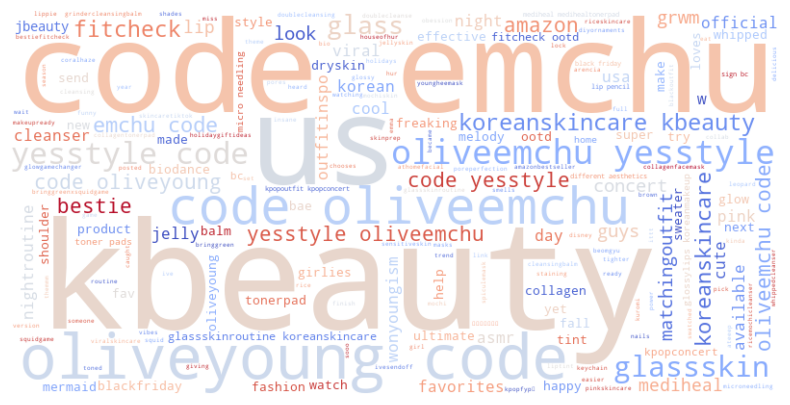

/var/folders/29/5wmqbm4j3x10qv5vgm_bm8f80000gn/T/ipykernel_1561/322645480.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_words_df, x='Count', y='Word', palette='viridis')


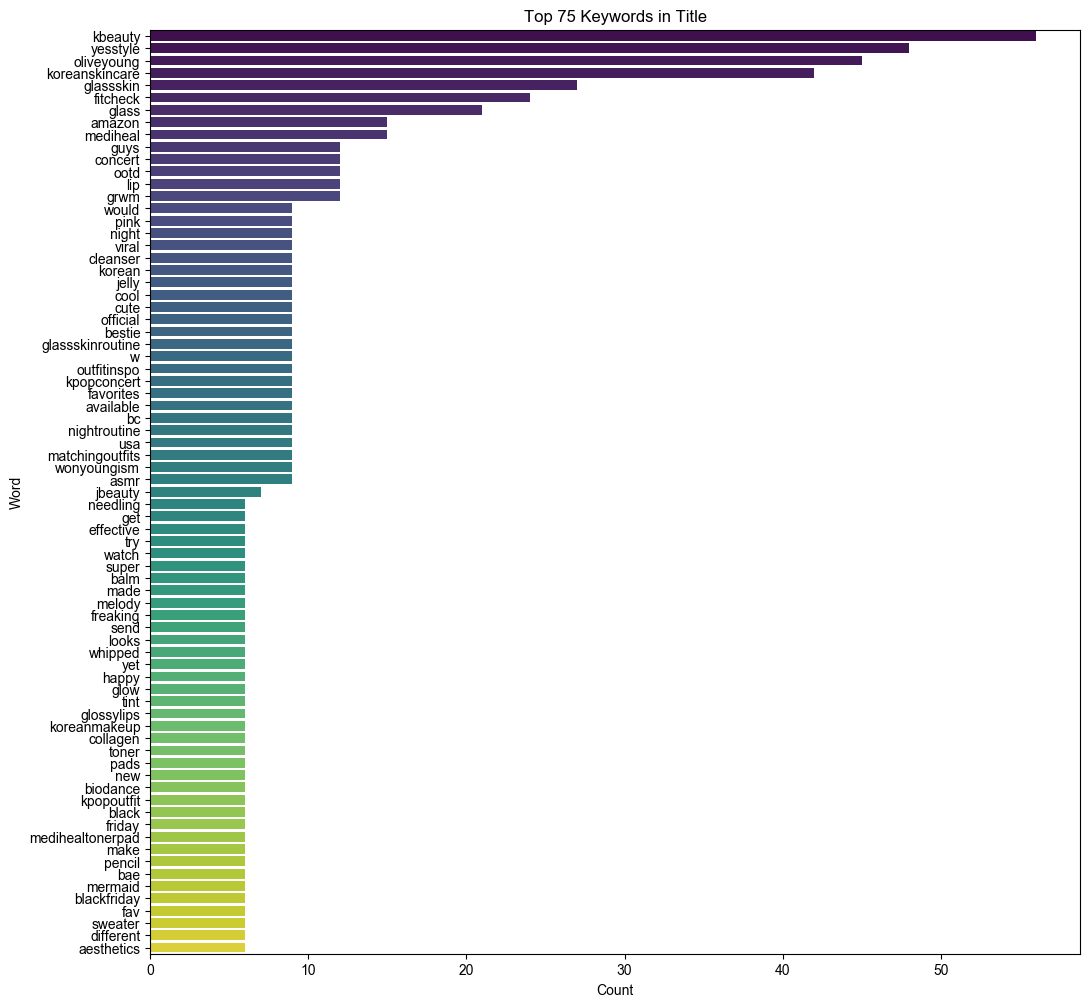

/var/folders/29/5wmqbm4j3x10qv5vgm_bm8f80000gn/T/ipykernel_1561/286366052.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  reviews_w_ngrams.cleaned_review = reviews_w_ngrams.stwd_info_tag_lemmatized.map(lambda x: replace_ngram(x) if isinstance(x, str) else x)


Round: 2
Round: 3
Round: 4
Round: 5
Round: 6
Round: 7
Round: 8
Round: 9


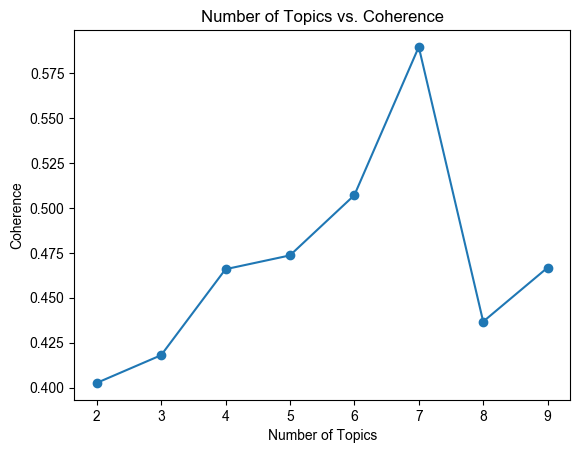

In [41]:
exclude_words = {'code', 'emchu', 'oliveemchu','us','com','www','http','instagram'}
tker_word_cloud(tker1, exclude_words)
ngram_lda(tiktoker_df, exclude_words, 2, 10)

In [50]:
tker_plt_pyLDAvis(tker1, 3, 0.9, 4, exclude_words)

토픽 1: fitcheck, ootd, kbeauty, koreanskincare, glassskin
토픽 2: koreanskincare, kbeauty, glassskin, fitcheck, ootd
토픽 3: kbeauty, koreanskincare, glassskin, ootd, fitcheck


## krystallee2222

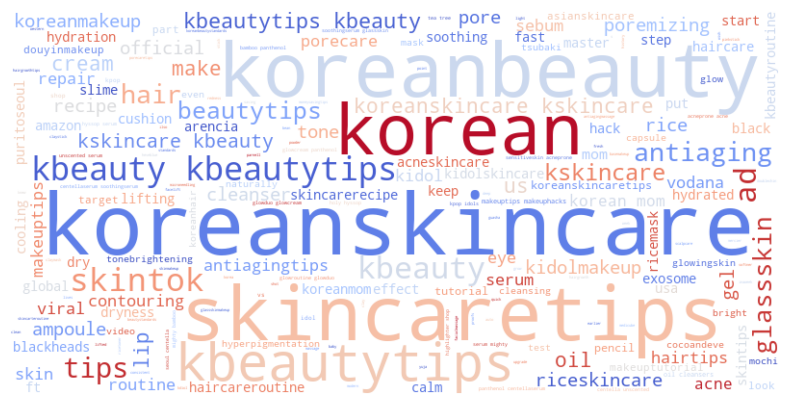

/var/folders/29/5wmqbm4j3x10qv5vgm_bm8f80000gn/T/ipykernel_1561/322645480.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_words_df, x='Count', y='Word', palette='viridis')


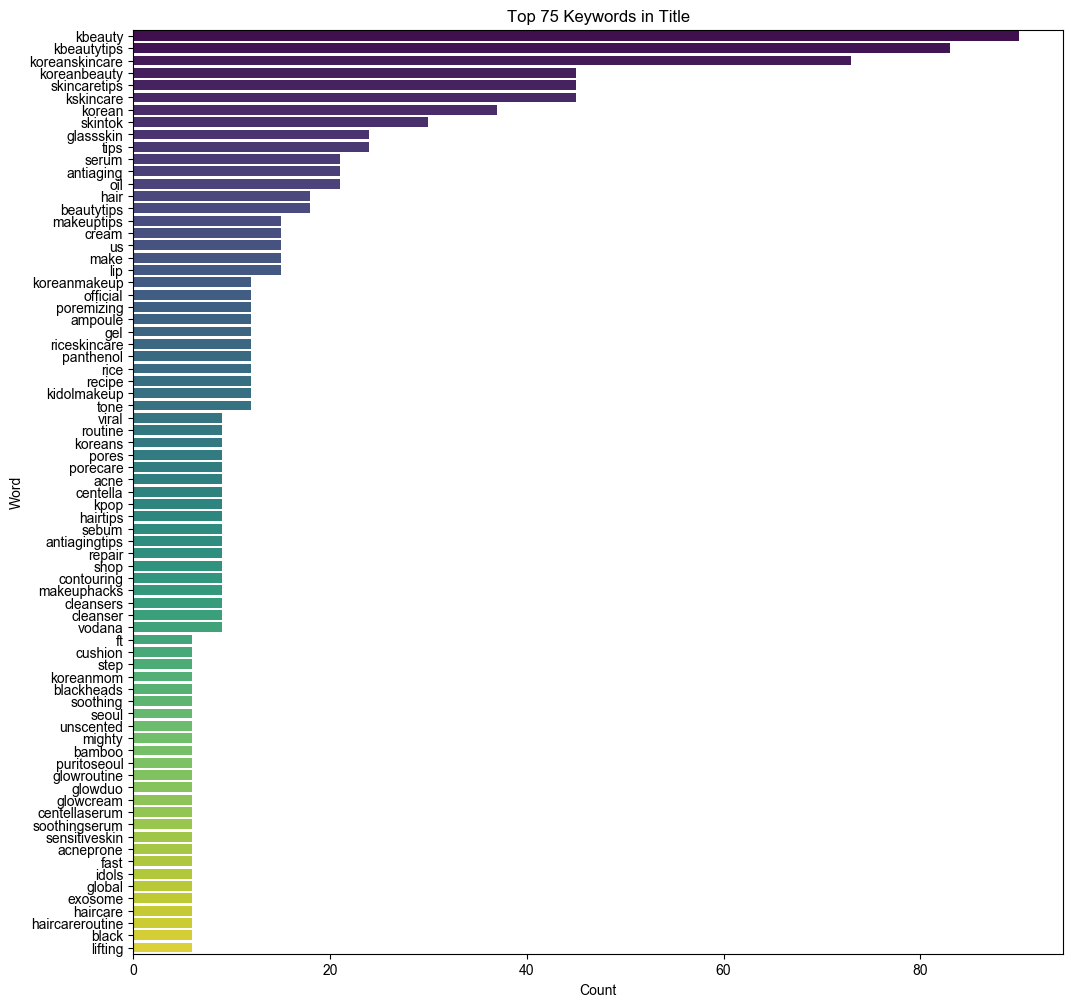

In [106]:
tker2 = tiktoker_df[tiktoker_df['name']== 'krystallee2222']

exclude_words = {"ad","mom"}
tker_word_cloud(tker1, exclude_words)


In [107]:
tker_plt_pyLDAvis(tker2, 3, 0.8, 4, exclude_words)

토픽 1: makeuptips, koreanmakeup, kidolmakeup, koreanbeauty, us, glassskin, official, beautytips
토픽 2: glassskin, official, beautytips, kskincare, antiaging, skincaretips, koreanbeauty, us
토픽 3: kskincare, skincaretips, koreanbeauty, skintok, antiaging, glassskin, beautytips, us


FileNotFoundError: [Errno 2] No such file or directory: './results/sklearn_lda_topics.html'

In [ ]:
exclude_words = {'us'}
tker_word_cloud(tker1, exclude_words)
tker_plt_pyLDAvis(tker1, 10, 0.9, 3,exclude_words)
lda_vis

In [ ]:
exclude_words = {'code', 'emchu', 'oliveemchu','us','`'}
tker_word_cloud(tker1, exclude_words)
tker_plt_pyLDAvis(tker1, 10, 0.9, 3,exclude_words)
lda_vis

In [ ]:
exclude_words = {'code', 'emchu', 'oliveemchu','us','`'}
tker_word_cloud(tker1, exclude_words)
tker_plt_pyLDAvis(tker1, 10, 0.9, 3,exclude_words)
lda_vis